Feature extraction untuk mendeteksi objek.

Jenis jenis machine learning:
1. Supervised learning
    dataset yg digunakan memiliki label dan algoritma kemudian mepelajari pola dari pasangan data dan label tersebut.
2. Unsupervised learning
    tidak ada label di dataset, melakukan proses belajar sendiri untuk melabeli/mengelompokkan data.
3. Semi-supervised learning
    gabungan dari 1 dan 2, di dataset half half ada label dan tidak
4. Reinforcement learning
    belajar menggunakan sistem reward dan penalti, belajar melalui proses trial dan error. ada action, agent, environment, dan reward

scripting, interactive

library ada numpy, pandas, matplotlib, tensorflow, scikit learn, keras dan pytorch

### Data Collecting

sumber untuk data collecting ada UCI ML Repository, kaggle, google dataset search engine, tensorflow dataset, satu data indonesia, US gov data, open data jawa barat

### Data Cleaning

konsistensi format, skala data, duplikasi data, missing value, skewness dist (keseimbangan data, atau untuk menghindari bias dan imbalance data, misal model cenderung memprediksi sesuatukarena ia lebih sering mempelajari hal tsb)

### Data Processing

Cenderung pake pandas, untuk manip tabel numerik dan time series. 

### Data Preparation
data ada 2 jenis yaitu numerik dan kategorik
ML tidak dapat mengolah data kategorik, jadi harus convert ke numerik, misal regresi linear dan SVM hanya menerima input numerik. Teknik convertnya itu dengan menggunakan 
- One Hot Encoding atau dummy variables

misal 0 untuk false dan 1 untuk true

- Outlier Removal

outlier adalah sebuah nilai yang jauh berbeda dari kumpulan nilai lainnya dan dapat mengacaukan hasil dari sebuah analisis statistik.

- Normalization

tujuannya mengubah nilai nilai dari sebuah fitur ke dalam skala yg sama
misal ada 2 fitur contoh gaji dan umur, gaji sampe jutaan angkanya, sedangkan umur puluhan, skalanya jauh beda. kalau bikin model seperti regresi linear, hal ini sangat mempengaruhi hasil prediksi.
normalization bisa pake min-max scaling, dimana nilai nilai akan dipetakan ke dalam skala 0 sampai 1, dari lib sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

scaler = MinMaxScaler() #kita bikin objek minmaxscaler
scaler.fit(data) #panggil fungsi fit untuk menghitung nilai minimum dan maksimum pada setiap kolom
# komputer baru ngitung nilai min dan max pada tiap kolom dan belum melakukan operasi scaler, panggil
# fungsi transform() untuk mengaplikasikan scaler

print(scaler.transform(data))

- Standardization

proses konversi nilai nilai dari suatu fitur sehingga nilai tsb punya skala yg sama. contoh metodenya Z Score dimana setiap nilai pada sebuah atribut numerik akan dikurangi dengan rata2 dan dibagi dengan standar deviasi dari seluruh nilai pada sebuah kolom atribut. serupa dengan normalization

In [9]:
from sklearn import preprocessing
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

#bisa nulisnya kek yg normalization
scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)
data


array([[-0.11638732,  0.23521877],
       [ 1.94277296,  1.80334389],
       [-0.83261698, -1.07155217],
       [-0.60879521, -0.67952089],
       [-0.38497344, -0.28748961]])

### Data Storage/Warehouse
- RDBMS, (yang serba sql, mysql, postgresql microsoft sql server)
- NoSQL (doc, graph, key-value, dan column based), cthnya mongodb, couchdb, cassandra, redis, neo4j dan riak.
- Firebase realtime database,
database yang menyimpan data yang berubah seiring waktu, disimpan dalam format waktu dan nilai pada waktu yg terkait.
- Apache Spark,
perangkat lunak untuk pemrosesan dan analisis data berskala besar. Spark dapat digunakan dalam proses ETL (Extract, Transform, Load), data streaming, perhitungan grafik, SQL, dan machine learning
- Biq Query,
data warehouse berbasis cloud untuk perusahaan yang menawarkan penyimpanan data berbasis SQL dan analisis data berukuran besar. Karena berbasis cloud dan tidak ada infrastruktur yang perlu dikelola, pengguna dapat berfokus pada pengolahan data tanpa memerlukan seorang administrator database. 

### Datasets
bagi dataset jadi 2 yaitu training set dan test set, biasanya train set lebih banyak daripada test set(?) pembagian data training dan data testing yang paling umum adalah 80:20, 70:30, atau 60:40 tergantung dari ukuran atau jumlah data. untuk dataset berukuran besar, proporsi pembagian 90:10 atau 99:1.

kita bisa pake fungsi train_test_split dari sklearn. sebelum displit, fungsi ini akan mengacak dataset secara internal, jadi merata kelasnya. ada random seed untuk internal pseudo-random generator yang digunakan pada proses shuffling. umumnya nilainya 0 atau 1 atau 42. ada random_state gunanya untuk memastikan bahwa hasil pembagian dataset konsisten dan memberikan data yang sama setiap kali model dijalankan. Jika tidak ditentukan, maka tiap kali melakukan split, kita akan mendapatkan data train dan tes berbeda, yang juga akan membuat akurasi model ML menjadi berbeda tiap kali di-run.  

parameter train_Test_split yaitu
x = atribut dari dataset
y = target dari dataset
test_size = persentase test set
random_state (1, 0, atau 42 bebas asal konsisten pake yg mana)

yang akan mengembalikan 4 nilai yaitu:
atribut train set
atribut test set
target train set
target test set

In [ ]:
from sklearn.model_selection import train_test_split
 
X_data = range(10)
y_data = range(10)
 
print("random_state ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.4, random_state = 42)
    print(y_test)
 
 
print("random_state tidak ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.4, random_state = None)
    print(y_test)

In [ ]:
# latihan split
import sklearn
from sklearn import datasets # lib sklearn menyediakan dataset iris, yg umum digunakan untuk masalah klasifikasi

iris = datasets.load_iris()
# pisahkan atribut dan label pada dataset

x = iris.data # adalah array dgn bentuk n_samples, dan n_Features, dimana sample adalah jumlah sampel/baris, dan features adalah jumlah kolom
y = iris.target # atribut berisi label kelas untuk setiap sampel data, misal label 0 kelas A, label 1 kelas B gt gt, arraynya adalah n_samples/baris yg sesuai dengan iris.data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(len(x))
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

### Data Evaluation

misal ada 10 jenis model, latih semua model tsb lalu bandingkan tingkat errornya, pililh yg paling kecil untuk tahap produksi. Lalu ketika diuji pada tahap produksi, tingkat errornya membesar, karena kita mengukur tingkat eror berulang kali pada test set, dan scr tidak sadar memilih model yg hanya bekerja dengan baik pada test set tsb, modelnya buruk ketika menemui data baru. solusinya adalah menambahkan validation set.

- Train, Test, Validation Set (pembagian datanya tambah 1 lagi)
validation/holdout adalah bagian dari train set untuk uji model tahap awal. jangan sampe ukuran validation set nya terlalu besar/kecil. solusinya pake cross validation

- Cross Validation
K-Fold Cross Validation. dataset akan dibagi sebanyak k lipatan. pada setiap iterasi setiap fold akan dipakai sekali sbg data test dan fold sisanya dibakai sbg data train. 

pake fungsi cross_val_score(), 4 parameter
clf atau classifier
x atribut dataset
y label dataset
cv yaitu jumlah fold yg akan dipake cross validation

akan mengembalikan nilai berupa larik/array yg terdiri dari akurasi pengujian setiap fold dari dataset.

In [23]:
import sklearn
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn import tree
# clf itu classifier, yaitu model machine learning
clf = tree.DecisionTreeClassifier()

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

elemen pertama dari larik menunjukkan nilai 0.966666667 yg berart ketika fold pertama dijadikan validation set dan fold lainnya dijadikan train set, hasil dari pengujian tsb adalah akurasi sebesar 0.96666. Secara umum jika hasil dari pengujian tiap fold pada cross validation memiliki nilai yang bervariasi dari 0.85 sampai 0.99, maka model tersebut dapat dikatakan baik.

### Supervised Learning

Algoritma yang termasuk supervised learning di antaranya adalah klasifikasi, regresi, decision tree, dan support vector machine.

algoritma yg populer adalah regresi, biasanya digunakan untuk memprediksi. Misalnya saat kita memprediksi harga rumah, model kita memprediksi harganya Rp. 499.999.000 atau Rp. 500.100.000, padahal harga seharusnya adalah Rp. 500.000.000. Perbedaan ini tak jadi masalah sebab hasil prediksi dalam regresi linear akan berada dalam range bilangan numerik tertentu yang mendekati nilai seharusnya. Inilah yang dimaksud dengan regresi memberikan keluaran yang kontinyu.

kalau klasifikasi itu memprediksi hasil dalam keluaran diskrit, contohnya email spam atau tidak yg tidak ada kontinuitas/kategori antara spam dan tidak.
algoritma lainnya: Linear Regression, Logistic Regression, Classification, Decision Trees, Support Vector Machines, Neural Networks.

- Binary Classification
klasifikasi adalah teknik untuk menentukan kelas atau kategori berdasarkan atribut yang diberikan. Klasifikasi yang menghasilkan dua kategori disebut klasifikasi biner, sedangkan klasifikasi yang menghasilkan 3 kategori atau lebih disebut multiclass classification atau klasifikasi banyak kelas. 

- Decision Tree
dipakai untuk masalah klasifikasi dan regresi. merupakan komponen pembangun utama algo random forest. DT memprediksi kelas/klasifikasi atau nilai/regresi berdasarkan aturan2 yg dibentuk setelah mempelajari data.

#### Latihan SKLearn Decision Tree

In [13]:
import pandas as pd
iris = pd.read_csv('Iris/Iris.csv')

In [ ]:
iris.info()

In [ ]:
iris.head()

In [14]:
# drop fitur yang ga guna
iris.drop('Id',axis=1,inplace=True)

In [15]:
# memisahkan atribut dan labe
x = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=123)


In [17]:
from sklearn.tree import DecisionTreeClassifier
# definisikan model decision tree yang akan digunakan
tree_model = DecisionTreeClassifier()
# melatih model dengan menggunakan data latih
tree_model = tree_model.fit(x_train, y_train)

In [18]:
# uji model menggunakan data test dengan menggunakan predict()
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(x_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)

Accuracy:  0.933


In [ ]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Selain melakukan prediksi, kita juga bisa melihat visualisasi dari decision tree yang kita buat terhadap data menggunakan library Graphviz. Hasil dari graphviz adalah dot file yang akan muncul pada folder file di panel sebelah kiri Google Colab (jika Anda menggunakan Google Colab).

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file= "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

Setelah kode di atas berhasil dijalankan, Anda akan mendapatkan output berupa berkas iris_tree.dot yang bisa kita convert ke png menggunakan situs konversi berkas berikut ini : https://onlineconvertfree.com/converter/images/. yang akan menghasilkan hasil visualisasi dari model decision tree yg telah digunakan.

Catatan : Jangan lupa ganti opsi ke images sebelum menekan tombol convert

- Regression

mirip klasifikasi, kalau klasifikasi itu memprediksi sebuah kelas, model regresi memprediksi bilangan kontinu/numerik. misal mempredisi gaji berdasarkan atribut2 spt lama kerja, industri dan tingkat pendidikan.
regresi ada linear, polinomial, lasso regression, stepwise regression dsb.

1. Linear Regression

cth paling terkenal memperkirakan harga rumah berdasarkan fitur yang terdapat pada rumah seperti luas rumah, jumlah kamar tidur, lokasi dan sebagainya. Regresi linier cocok dipakai ketika terdapat hubungan linear pada data. 

regresi linear adalah teknik untuk memprediksi sebuah nilai adri variable Y (var dependen) berdasarkan beberapa variabel tertentu X (var independen) jika terdapat hubungan linier antara X dan Y.

Hubungan antara hubungan linier dapat direpresentasikan dengan sebuah garis lurus (disebut garis regresi). Ketika sebuah garis regresi digambar, beberapa data akan berada pada garis regresi dan beberapa yang lainnya akan berada di dekat garis tersebut. Sebabnya, garis regresi adalah sebuah model probabilistik dan prediksi kita adalah perkiraan. Jadi tentu akan ada eror/penyimpangan terhadap nilai asli dari variabel Y. Makin jauh jarak data ke garis regresi maka masih banyak error dan model regresi itu belum optimal.

2. Logistic Regression

nama lainnya maximum-entropy classification, dan log-linear classification, jadi dapat digunakan untuk klasifikasi, dimana logistic regression bekerja dengan menghitung probabilitas kelas dari sebuah sampel. 

Contohnya sebuah email memiliki probabilitas 78% merupakan spam maka email tersebut termasuk dalam kelas spam. Dan jika sebuah email memiliki <50% probabilitas merupakan spam, maka email tersebut diklasifikasikan bukan spam.


#### Latihan SKLearn Linear Regression

In [22]:
import numpy as np
# data jumlah kamar
bedrooms = np.array(([1,1,2,2,3,4,4,5,5,5]))

# data harga rumah dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

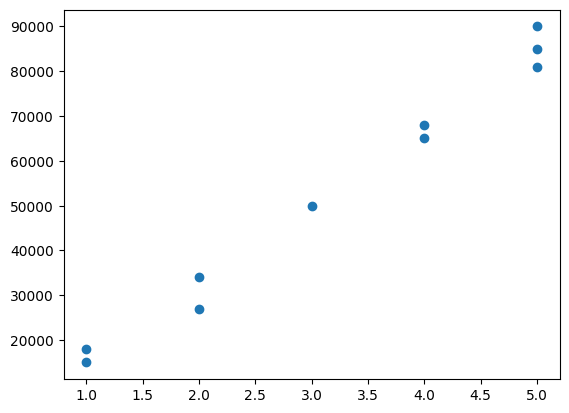

In [24]:
# jumlah kamar pada sumbu X var independen dan harga rumah pada sumbu Y var dependen
# menampilkan data tsb dalam bentuk scatter plot
import matplotlib.pyplot as plt
# menampilkan grafik atau visualisasi secara langsung di dalam halaman notebook
%matplotlib inline 

plt.scatter(bedrooms, house_price)

In [25]:
# mulai melatih model dgn fungsi LinearRegression.fit()
from sklearn.linear_model import LinearRegression

bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression()

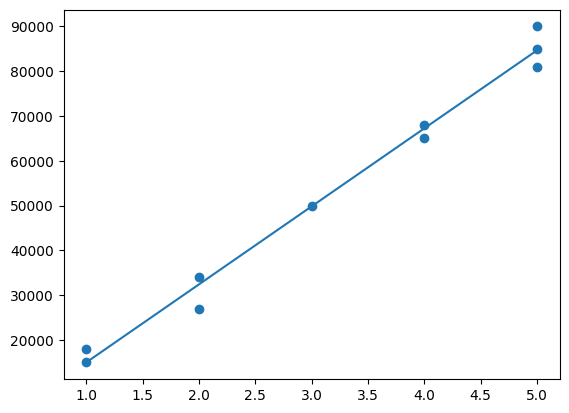

In [26]:
# melihat bagaimana model menyesuaikan dgn data yg kita miliki dengan membuat plot
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

#### Latihan SKLearn Logistic Regression

In [27]:
import pandas as pd

df = pd.read_csv('LogisticRegression/Social_Network_Ads.csv')

In [28]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [30]:
data = df.drop(columns=['User ID'])

In [35]:
# karena ada gender male dan female, gunakan one-hot encoding/get dummy
# ini karena hasilnya false/true sedangkan kita maunya 0/1
data = data.astype(int)

data = pd.get_dummies(data, dtype=int)
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [36]:
# pisahkan atribut dan label
x = data [['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']]
y = data['Purchased'] 

In [37]:
# sebelum split data, lakukan standarisasi/normalisasi
from sklearn.preprocessing import StandardScaler
# membuat objek scaler
scaler = StandardScaler()
# melakukan proses pembelajaran/fitting terhadap x, menghitung mean dan SD dari setiap fitr dataset
scaler.fit(x)
# transform skala data untuk dinormalisasi
scaled_data = scaler.transform(x)
# mengonversi scaled data kedalam dataframe pandas yg akan menggunakan nama kolom yg sama dengan data asli, yaitu X.columns
scaled_data = pd.DataFrame(scaled_data, columns=x.columns)

scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [38]:
# split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

In [39]:
# membuat model dgn membuat objek logistic regression, lalu latih/fitting

from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
# menguji akurasimodel
akurasi_score = model.score(x_test, y_test)
print('Accuracy: ', akurasi_score)

Accuracy:  0.825


### Unsupervised Learning

metode unsupervised slh satunya GANs 

Algoritma yang termasuk adalah clustering, pendeteksian anomali (anomaly detection), dan pengurangan dimensi (dimension reduction), dan density estimation.

Clustering ada data tanpa label, ML akan mempelajari pola dan struktur pada data berdasar hub dan keterkaitan antar variabel pada data. lalu model ML akan mengelompokkan data ini ke dalam beberapa klaster yg berbeda. contoh kasus clustering adalah customer segmentation, customer web ecommrce misalnya.

#### K-Means Clustering
k means pertama tama akan memilih sebuah sampel scr acak untuk dijadikan centroid yaitu sampel pada data yg menjadi pusat dari sebuah klaster. karena centroid merupakan pusat dari sebuah klaster, setiap sampel akan masuk ke klaster. dimana pengelompokan klusternya berdasarkan jarak, mana yg deket dengan centroid, masuk kedalam klaster centroid tsb (langkah kedua)

ketiga, selanjutnya kmeans akan menghitung rata rata dari setiap sampel dan menjadikan rata rata tsb sbg centroid baru.

keempat, langkah kedua diulangi kembali, lalu mengulangi langkah ketiga kembali. Anda akan menemukan rata-rata tiap klaster di tahap keempat akan sama dengan rata-rata tiap klaster pada tahap ketiga sehingga centroidnya tidak berubah. Ketika centroid baru tidak ditemukan, maka proses clustering berhenti.

Untuk mengukur kualitas dari pengklasteran, K-Means akan melakukan iterasi lagi dan mengulangi lagi tahap pertama yaitu memilih sampel secara acak untuk dijadikan centroid. lalu diulangi langkah2 diatas.

dan ternyata hasil iterasi kedua lebih baik drpd pertama. untuk membandingkan klaster setiap iterasi, K-Means akan menghitung variance dari tiap iterasi. Variance adalah persentase jumlah sampel pada tiap klaster. dimana pada kasus ini hasil kedua variancenya lebih seimbang.

Metode Elbow

untuk menentukan jumlah K atau klaster pada kmeans adalh dng melihat langsung persebaran data, tujuannya untuk menentukan elbow/jumlah K yg optimal.

#### Latihan SKLearn K-means

In [42]:
import pandas as pd
df = pd.read_csv('Mailcust/Mall_Customers.csv')

df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [43]:
# rename collom agar lebih seragam
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# ubah data kategorik menjadi data numerik
# df['gender'] = df['gender'].replace(['Female', 'Male'], [0, 1]) kalo gapake inplace true
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

df.head(3)


,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


axis=0: Ini mengacu pada operasi yang berlangsung sepanjang baris (atau sering disebut sebagai sumbu baris).
axis=1: Ini mengacu pada operasi yang berlangsung sepanjang kolom (atau sering disebut sebagai sumbu kolom).

Selanjutnya kita akan menentukan nilai K yang optimal dengan metode Elbow. Library K-means dari SKLearn menyediakan fungsi untuk menghitung inersia dari K-Means dengan jumlah K tertentu. Di sini kita akan membuat list yang berisi inersia dari nilai K antara 1 sampai 11. Inertia adalah ukuran untuk sejauh mana data poin dalam suatu kluster berjarak dari pusat kluster (centroid). Semakin rendah nilai inertia, semakin baik kluster yang dihasilkan.

In [ ]:
from sklearn.cluster import KMeans

x = df.drop(['CustomerID', 'gender'], axis=1)

# membuat list yg berisi inertia
clusters = []
for i in range(1,11):
    # membuat objek kmeans dgn jumlah kluster yg sedang dievaluasi, dan fitur x akan  difitting ke model k means yg dibuat
    km = KMeans(n_clusters=i).fit(x)
    # inertia model tsb akan dihitung dan dimasukkan ke dalam array/lis clusters
    clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

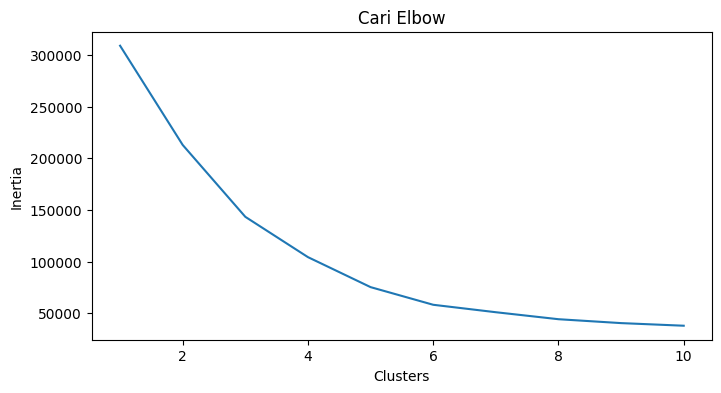

In [51]:
# membuat plot inersia dari tiap nilai K
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Membuat sebuah subplot (gambar atau plot tunggal) dengan ukuran 8x4. fig adalah objek untuk seluruh gambar (figure), dan ax adalah objek untuk sumbu (axes) pada gambar tersebut. Subplot ini akan digunakan untuk menampilkan line plot nanti.
fig, ax = plt.subplots(figsize=(8,4))
# Parameter x adalah nilai-nilai yang akan ditampilkan di sumbu horizontal (x-axis), dalam hal ini, kita menggunakan list dari 1 hingga 10 sebagai nilai x. Parameter y adalah nilai-nilai yang akan ditampilkan di sumbu vertikal (y-axis), yaitu data dari list clusters. Parameter ax digunakan untuk menentukan di subplot mana line plot akan ditampilkan, yaitu subplot yang telah dibuat sebelumnya.
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

kita bisa melihat bahwa elbow berada di nilai K sama dengan 5, di mana penurunan inersia tidak lagi signifikan setelah nilai K sama dengan 5.

C:\Users\ASUS ROG STRIX\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


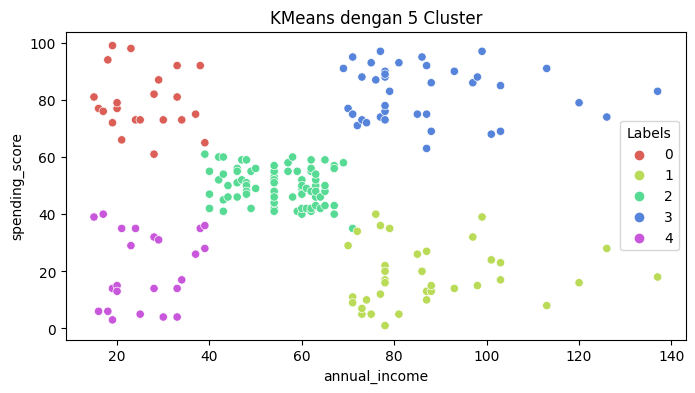

In [47]:
# melatih kembali kmeans dgn jumlah k yang didapat dari elbow
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(x)
 
# menambahkan kolom label pada dataset
x['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=x['annual_income'], y=x['spending_score'], hue=x['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

### Dimensionality Reduction: LDA, PCA, t-SNE
misalnya itu dalam image recognition, kan atribut dari imagenya adalah jumlah pixelnya, tp tidak semua pixel didalam gambar itu dipake untuk pelatihan. jadinya direduksi.

- Principal Component Analysis (PCA)

mereduksi dimensi atau mengurangi jumlah atribut pada dataset tanpa mengurangi informasi. Pada PCA setiap atribut disebut sebagai principal component. Jika terdapat 10 atribut pada dataset, berarti terdapat 10 principal component. PCA bekerja dengan menghitung variance dari tiap atribut. Variance adalah informasi yang dimiliki sebuah atribut. 

- Linear Discriminant Analysis (LDA)

atau analisis diskriminan linier adalah teknik statistika yang dipakai untuk reduksi dimensi. LDA bekerja dengan mencari kombinasi atribut terbaik yang dapat memisahkan kelas-kelas pada dataset dan meminimalkan varian pada masing-masing kelas. Kontras dengan PCA yang bekerja dengan mencari atribut komponen yang memiliki varian tertinggi.

yang membedakan LDA dan PCA adalah PCA merupakan teknik unsupervised karena pada pengurangan dimensi, PCA tidak menghiraukan label yang terdapat pada dataset. Sedangkan LDA merupakan teknik supervised karena LDA memperhatikan bagaimana kelas-kelas pada data dapat dipisahkan dengan baik. 

- t-sne

t-Distributed Stochastic Neighbor Embedding adalah teknik non linear unsupervised yang digunakan untuk reduksi dimensi, eksplorasi data, dan visualisasi data berdimensi tinggi. Algoritma t-SNE memungkinkan kita untuk memisahkan data yang tidak dapat dipisahkan oleh garis linear.

t-SNE mengurangi dimensi dengan menjaga sampel-sampel yang mirip agar berdekatan, dan sebaliknya, sampel-sampel yang kurang mirip, berjauhan. 

#### Latihan SKLearn PCA

In [52]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
atribut = iris.data
label = iris.target

x_train, x_test, y_train, y_test = train_test_split(atribut, label, test_size=0.2, random_state=1)

In [53]:
# menggunakan model decision tree dan menghitung berapa akurasinya tanpa menggunakan pca
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(x_train, y_train)
model_pertama.score(x_test, y_test)

0.9666666666666667

In [55]:
# kemudian menggunakan pcs dan menghitung varians dari setiap atribut
from sklearn.decomposition import PCA
# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)

# mengapliaksikan pca ke dataset
pca_attributes = pca.fit_transform(x_train)

# melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.92848323, 0.04764372, 0.01931005, 0.004563  ])

Hasilnya adalah 1 atribut memiliki variance sebesar 0.922, yang berarti atribut tersebut menyimpan informasi yang tinggi dan jauh lebih signifikan dari atribut lain. 

Melihat dari variance sebelumnya kita bisa mengambil 2 principal component terbaik karena total variance nya adalah 0.976 yang sudah cukup tinggi.

In [56]:
# pca dgn 2 principal component
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

In [59]:
# uji akurasi classifier menggunakan pca
# uji akurasi classifier
model2 = decision_tree.fit(x_train_pca, y_train)
model2.score(x_test_pca, y_test)

0.9333333333333333

Dari percobaan di atas bisa kita lihat bahwa dengan hanya 2 principal component atau 2 atribut saja model masih memiliki akurasi yang tinggi. Dengan principal component kamu bisa mengurangi atribut yang kurang signifikan dalam prediksi dan mempercepat waktu pelatihan sebuah model machine learning.

### Support Vector Machine
model ML multifungsi yg dapat digunakan untuk klasifikasi, regresi, dan pendeteksian outlier, dan termasuk dalam supervised learning. tujuannya untuk menemukan hyperplane(kek garis pemisah) dalam rang berdimensi-N (ruang dengan N-jumlah fitur) yg brfungsi sebagai pemisah yg jelas bagi titik2 data input. contoh penggunaan svm adalah fitur deteksi wajah (topik computer vision). selain itu bidang bioinformatika.

#### Support Vector Machine Classifier
- Linier

SVM bekerja dengan membuat decision boundary atau sebuah bidang yang mampu memisahkan dua buah kelas. Pada masalah ini decision boundary.

ada high margin classification dan low margin classification, yg high lebih lebar marginnya.

dalam klasifikasi 2 kelas, sampel yg paling dekat dengan sampel lainnya akan menjadi support vector, setelah itu kita mncari jalan terlebar dari 2 support vector dengan menggambar 2 hyperplane, dimana jarak antara kedua hyperplane itu adalah margin. setelah menemukan jalan terlebar, decision boundary (tepat ditengah kedua hyperplane/membagi margin menjadi 2 bagian yg sama besar) lalu digambar berdasarkan jalan tersebut.

Decision boundary adalah garis yang membagi jalan atau margin menjadi 2 bagian yang sama besar.Hyperplane adalah bidang yang memisahkan kedua kelas, sedangkan margin adalah lebar ‘jalan’ yang membagi kedua kelas.

- Non linier

Support Vector Classifier menggunakan sebuah metode yaitu “kernel trick” dengan mengubah data pada dimensi tertentu spt 2D ke 3D. Pertama, kita perlu menghitung skor jarak dari dua titik data, misal x_i dan x_j. Skor akan bernilai lebih tinggi untuk titik data yang lebih dekat, dan sebaliknya. Lalu kita gunakan skor ini untuk memetakan data pada dimensi yang lebih tinggi (3D).

fungsi2 kernel:
Linear, RBF (Radial Basis Function) atau Gaussian kernel, Polinomial, Sigmoid

- SVM untuk klasifikasi multi-class

SVM melakukan klasifikasi biner untuk masing-masing kelas. Model kemudian memisahkan kelas tersebut dari semua kelas lainnya, menghasilkan model biner sebanyak jumlah kelasnya. dengan menggunakan teknik one-vs-rest. 

#### Latihan SKLearn SVM untuk Klasifikasi

In [4]:
import pandas as pd

df = pd.read_csv('Diabetes/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

In [6]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
# mengambil slice pertama delapan elemen dari daftar kolom
x = df[df.columns[:8]]

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

In [7]:
# menyamakan skala glucose dan diabets pedigree function
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.svm import SVC
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [11]:
# hitung akurasi
print('Accuracy: ', clf.score(x_test, y_test))

Accuracy:  0.7559055118110236


#### Support Vector Regression

support vector juga bisa dipakai untuk prediksi data kontinu yaitu kasus regresi. prinsipnya sama dengan yg klasifikasi. Perbedaannya adalah jika pada kasus klasifikasi, SVM berusaha mencari ‘jalan’ terbesar yang bisa memisahkan sampel-sampel dari kelas berbeda, maka pada kasus regresi SVR berusaha mencari jalan yang dapat menampung sebanyak mungkin sampel di ‘jalan’. 

Lebar jalan dikontrol oleh hyperparameter ϵ, yang juga disebut maksimum eror. Menambahkan data training ke dalam margin tidak akan mempengaruhi prediksi model. Oleh karena itu, model disebut sebagai ϵ-insensitivity (tidak sensitif-ϵ).

Berbeda dengan SVM di mana support vector adalah 2 sampel dari 2 kelas berbeda yang memiliki jarak paling dekat, pada SVR support vector adalah sampel yang menjadi pembatas jalan yang dapat menampung seluruh sampel pada data.

algoritma SVR ini tidak bisa memberikan hasil prediksi yang baik untuk seluruh data sebab beberapa titik masih berada di luar batas. Oleh karena itu, kita perlu menambahkan parameter lain pada algoritma yaitu parameter C yang disebut sebagai regularization parameter atau parameter keteraturan. Ada juga yang menyebutnya slack parameter. regularization parameter ini berfungsi untuk menghindari overfitting pada training data.

2 parameter pada SVR:<br >
parameter ϵ yang menunjukkan margin of error dan parameter C yang merupakan parameter keteraturan atau regularization parameter.

tiga jenis implementasi Support Vector Regression pada scikit-learn yaitu: SVR, NuSVR, dan LinearSVR. Implementasi dari LinearSVR lebih cepat dari SVR tetapi hanya dapat digunakan untuk kernel linear, sedangkan NuSVR mengimplementasikan formula yang sedikit berbeda dari SVR dan LinearSVR. NuSVR menggunakan parameter nu untuk mengontrol jumlah support vector.

#### Latihan SKLearn SVR


In [18]:
import pandas as pd

data = pd.read_csv('SalaryData/Salary_Data.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


 Ketika hanya terdapat satu atribut pada dataframe, maka atribut tersebut perlu diubah bentuknya agar bisa diterima oleh model dari library SKLearn. Untuk mengubah bentuk atribut kita membutuhkan library numpy.

In [24]:
import numpy as np

# memisahkan atribut dan label
x = data['YearsExperience']
y = data['Salary']

# mengubah objek Series menjadi array NumPy, kalau langsung baris terakhir udah ga support katanya
x = x.to_numpy()

# mengubah array 1D (vektor) menjadi array 2D (matriks) dengan menambahkan dimensi baru pada posisi kedua. 
x = x[:,np.newaxis]

Dengan menggunakan np.newaxis, kita berhasil mengubah array 1D (vektor) menjadi array 2D (matriks) atau lebih tinggi dengan menambahkan dimensi baru pada posisi kedua. Hal ini seringkali dibutuhkan saat kita bekerja dengan algoritma atau fungsi pada library machine learning yang mengharapkan data masukan dalam bentuk matriks, bukan vektor.

Berikutnya kita buat objek support vector regression dan di sini kita akan mencoba menggunakan parameter C = 1000, gamma = 0.05, dan kernel ‘rbf’. Setelah model dibuat kita akan melatih model dengan fungsi fit pada data.

In [25]:
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR(C=1000, gamma=0.05, kernel='rbf')

# melatih model
model.fit(x,y)

SVR(C=1000, gamma=0.05)

kernel 'rbf' adalah karena kernel ini sering digunakan dalam SVR untuk menangani kasus di mana data tidak sepenuhnya linier dan memiliki hubungan yang kompleks.

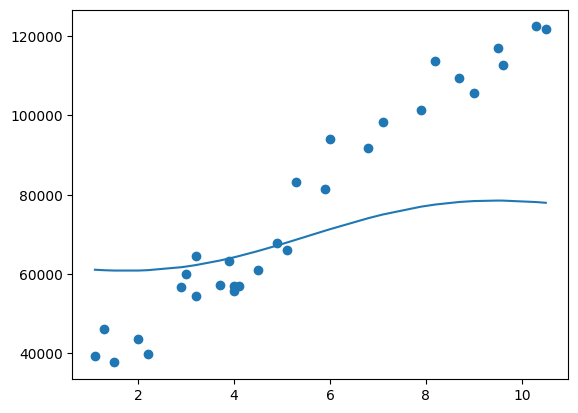

In [26]:
import matplotlib.pyplot as plt

# visualisasi model
plt.scatter(x,y)
plt.plot(x, model.predict(x))

belum mampu menyesuaikan terhadap pola pada data dengan baik, makanya pake grid search.

### Machine Learning Workflow
- Proses pengumpulan data.
- Exploratory Data Analysis

EDA bertujuan sebagai analisa awal terhadap data dan melihat bagaimana kualitas data untuk meminimalkan potensi kesalahan di kemudian hari. EDA dilakukan dengan dua cara, yaitu univariate analysis, dan multivariate analysis. Univariate analysis adalah analisis deskriptif yang memeriksa pola dengan satu variabel pada modelnya. Multivariate analysis merupakan analisis deskriptif yang memeriksa pola dalam data multidimensi dengan membertimbangkan dua atau lebih variabel. Jika terdapat dua variabel yang akan dianalisis, maka disebut bivariate analysis. 

- Data Preprocessing

mengubah dan mentransformasi fitur-fitur data ke dalam bentuk yang mudah diinterpretasikan dan diproses oleh algoritma machine learning. Termasuk di dalam data preprocessing adalah proses data cleaning dan data transformation.

hal yang bisa dilakukan dalam proses data cleaning adalah: penanganan missing value, data yang tidak konsisten, duplikasi data, ketidakseimbangan data, dll. Sementara beberapa hal yang bisa dilakukan untuk proses transformasi data adalah: scaling atau merubah skala data agar sesuai dengan skala tertentu, standarisasi, normalisasi, mengonversi data menjadi variabel kategori, dan sebagainya. Tidak lupa pula, proses train-test split

- Model Selection

Proses menemukan performa terbaik model dengan pengaturan hyperparameter yang berbeda ini juga disebut model selection. selain itu juga merupakan pemilihan learning method atau algoritma ML.

cth untuk kasus klasifikasi biner perlu pertimbangkan apakah logistic regresisom atau svm classifier.

- Model Evaluation

proses model evaluation adalah menilai kinerja model ML pada data baru, yaitu data yang belum pernah “dilihat” oleh model sebelumnya.

langkah evaluasi model dapat dijabarkan sebagai berikut: memprediksi label pada data uji, menghitung jumlah prediksi yang salah (eror) kemudian membandingkannya dengan data label yang kita miliki. Dari data perbandingan ini kita dapat menghitung akurasi atau performa model. 

- Deployment
menyimpan model yang telah dilatih dari tahap preprocessing hingga pipeline prediksi. Kemudian deploy model tersebut ke tahap produksi untuk membuat prediksi dengan memanggil kode predict()-nya.

Misalnya sebuah model regresi untuk menentukan harga rumah akan digunakan dalam situs web. Pengguna akan mengetik beberapa data tentang lokasi yang diinginkan dan mengeklik tombol “Prediksi Harga”. Proses ini akan mengirimkan query yang berisi data ke server, kemudian meneruskannya ke aplikasi web Anda. Terakhir, kode akan memanggil fungsi predict() untuk memberikan hasil prediksi pada Anda. 

- Monitoring

### Machine Learning Use Case
ML dan business intelligence.
ML di bidang data analytic.

### Overfitting dan Underfitting
layak untuk di-deploy di tahap produksi adalah model yang tidak underfit atau overfit. Model yang bagus adalah model Good Fit. 

#### Overfitting
Overfitting terjadi ketika model memiliki prediksi yang terlalu baik pada data training, namun prediksinya buruk pada data testing. Pada model klasifikasi jika akurasi model pada data training tinggi dan data testing rendah, maka model yang Anda kembangkan overfitting. Pada model jenis regresi, jika model membuat kesalahan yang tinggi pada data testing maka model tersebut overfitting.

#### Underfitting
Underfit terjadi ketika model terlalu sederhana dan tidak mampu untuk menyesuaikan pola yang terdapat pada data latih. jika memiliki eror yang tinggi pada data training. Pada kasus klasifikasi, underfitting ditandai ketika model memiliki akurasi yang rendah pada data training. Pada kasus regresi, underfitting terjadi ketika model memiliki tingkat eror yang tinggi.

### Model Selection
Sebuah model machine learning memiliki parameter yang dapat di tuning, contohnya parameter n_cluster pada kmeans, mengubah parameter -- dalam hal ini memilih jumlah n_cluster adalah tuning parameter. tujuan tuning parameter in iuntuk meningkatkan performa model machine learning. tujuan tuning pada model yaitu agar model memiliki tingkat eror yang lebih kecil atau akurasi yang lebih baik. teknik untukmenguji beberapa parameter sekaligus, yaitu grid search.

#### Latihan SKlearn dengan teknik Grid Search

In [27]:
import pandas as pd

data = pd.read_csv('SalaryData/Salary_Data.csv')

import numpy as np

x = data['YearsExperience']
y = data['Salary']

x = x.to_numpy()

x = x[:,np.newaxis]

untuk menggunakan grid search, kita impor library GridSearchCV dari sklearn.model_selection. Lalu kita buat model yang ingin kita uji dengan grid search dalam hal ini model SVR. Kemudian kita buat sebuah python dictionary yang berisi nama parameter yang akan diuji, serta nilai-nilainya. Selanjutnya kita buat objek grid search dan mengisi parameter-parameternya. Parameter pertama adalah model yang akan kita uji. Parameter kedua adalah dictionary yang berisi kumpulan parameter dari model yang akan diuji. Terakhir kita panggil fungsi fit() pada objek grid search yang telah kita buat.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}
grid_search = GridSearchCV(model, parameters)

# melatih model dengan fungsi fit
grid_search.fit(x,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [29]:
# menampilkan parapemet terbaik dari objek grid_search
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [30]:
# lalu baru kita bisa membuat model SVM baru dengan parameter terbaik hasil grid search
model_baru  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(x,y)

SVR(C=100000, gamma=0.005)

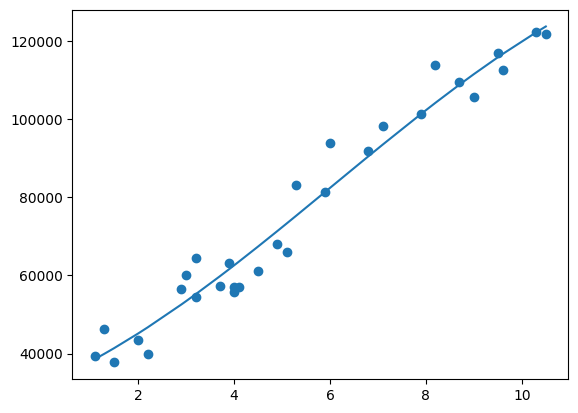

In [31]:
# visualisasika nSVR dengan parameter hasil grid search
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, model_baru.predict(x))

### Menambahkan/Mengurangi Fitur
beberapa teknik lain dalam rekayasa fitur

- Binning

Binning adalah pengelompokan nilai sesuai dengan batas besaran yang ditentukan. Pada binning, data dikelompokkan dalam tiap ‘bin’ sesuai dengan nilai yang cocok dengan bin tersebut. Bin sederhananya adalah sebuah kategori yang menampung nilai-nilai tertentu. Ada beberapa jenis binning di mana salah satu contohnya adalah binning jarak. Pada binning jarak, nilai-nilai dari sebuah atribut akan dikategorikan ke dalam jumlah bin tertentu yang memiliki interval sama besar. Binning bisa membantu untuk menghindari overfitting.

In [ ]:
import pandas as pd

data['bin'] = pd.cut(data['value'], bins=[0, 30,  70, 100], labels=['Low', 'Mid', 'High'])

 value    bin
0      13    Low
1      25    Low
2      32    Mid
3      94    High
4      49    Mid

- Splitting

Memisahkan sebuah atribut menjadi atribut-atribut baru. dan membuat atribut lebih mudah dipahami oleh model machine learning. contoh full name jadi first name dan last name.


In [38]:
import pandas as pd 
 
Developer = pd.DataFrame({'Name': ['Isyana Saraswati', 'Nicholas Saputra', 'Raisa Andriana'], 
        'Age':[30, 36, 32]}) 
print("Machine Learning Developer di Indonesia :\n", Developer) 
 
Developer[['First','Last']] = Developer.Name.str.split(expand=True) 
print("\n Split kolom 'Name', lalu tambahkan kedua kolom : \n", Developer)

Machine Learning Developer di Indonesia :
                Name  Age
0  Isyana Saraswati   30
1  Nicholas Saputra   36
2    Raisa Andriana   32

 Split kolom 'Name', lalu tambahkan kedua kolom : 
                Name  Age     First       Last
0  Isyana Saraswati   30    Isyana  Saraswati
1  Nicholas Saputra   36  Nicholas    Saputra
2    Raisa Andriana   32     Raisa   Andriana


- Interaction Feature

Membuat atribut baru melalui interaksi antar atribut disebut. dimana kita menciptakan fitur atau atribut baru dari atribut-atribut yang ada. Mengkombinasikan dua atribut kadang bisa menjelaskan varian data dengan lebih baik dibanding dua atribut yang dioperasikan secara terpisah. Misalnya perkalian produk antara dua buah fitur. Analoginya adalah logika AND. tetapi biaya komputasinya cukup tinggi. solusinya bisa melakukan feature selection, dan menyusun (handcrafted) sejumlah kecil fitur kompleks secara hati-hati.

### Artificial Neural Network
#### Perceptron
adalah komponen dasar pembangun jaringan saraf tiruan. Pada jaringan saraf tiruan, perceptron dan neuron merujuk pada hal yang sama. Sebuah perceptron menerima masukan berupa bilangan numerik. Perceptron kemudian memproses masukan tersebut untuk menghasilkan sebuah keluaran. Sebuah perceptron terdiri dari 5 komponen yaitu: Input (xi), Bobot atau weights (Wi), dan bias (W0), Penjumlahan atau sum (∑), Fungsi aktivasi atau non linearity function (⎰), dan Output (y)

#### Multi Layer Perceptron
adalah sebuah jaringan saraf yang terdiri dari satu layer input, satu atau lebih hidden layer, dan satu output layer. MLP yang memiliki banyak hidden layer disebut juga Deep Neural Network (DNN).

#### Propagasi Balik
Algoritma propagasi balik memungkinkan MLP untuk belajar membuat prediksi menjadi semakin baik dengan suatu teknik yang disebut chain rule.

#### Klasifikasi dengan MLP
MLP adalah model machine learning kategori supervised sehingga MLP dapat dipakai dalam kasus klasifikasi dan regresi. 

### Convolutional Neural Network
- Convolutional Layer<br />
Sebuah jaringan saraf biasa mengenali gambar berdasarkan piksel-piksel yang terdapat pada gambar. Teknik yang lebih optimal adalah dengan menggunakan convolutional layer di mana alih alih mengenali objek berdasarkan piksel-piksel, jaringan saraf dapat mengenali objek berdasarkan atribut-atribut yang memiliki lebih banyak informasi.

- Filter<br />
Convolutional layer dapat mengenali atribut pada objek menggunakan filter. Filter hanyalah sebuah matriks yang berisi angka-angka.

- Proses Konvolusi<br />
Proses konvolusi adalah proses yang mengaplikasikan filter pada gambar. Pada proses konvolusi ada perkalian matriks terhadap filter dan area pada gambar.

- Max Pooling<br />
umumnya setelah proses konvolusi pada gambar masukan, akan dilakukan proses pooling. Pooling adalah proses untuk mengurangi resolusi gambar dengan tetap mempertahankan informasi pada gambar. Salah satu contoh dari pooling adalah max pooling. Pada max pooling di antara setiap area dengan luas piksel tertentu, akan diambil satu buah piksel dengan nilai tertinggi. Hasilnya akan menjadi gambar baru. 

- Arsitektur Convolutional Neural Network<br />
Arsitektur CNN adalah sebuah jaringan saraf yang menggunakan sebuah layar konvolusi dan max pooling.

### TensorFlow
pada TensorFlow, data dimodelkan sebagai tensor (array berdimensi-n) dengan elemen yang memiliki salah satu dari tipe data int32, float32, atau string. Secara alami, tensor mewakili masukan untuk operasi matematika dalam berbagai algoritma machine learning. Sebagai contoh, perkalian matriks membutuhkan dua buah tensor 2-D dan akan menghasilkan tensor 2-D juga. 

### Library Keras
Keras adalah API untuk mengembangkan jaringan saraf tiruan. Dengan Keras kita dapat membuat sebuah multi layer perceptron dan convolutional neural network dengan sangat mudah. Komponen inti pembangun sebuah jaringan saraf tiruan dalam Keras adalah layer. Sebuah layer pada Keras, sama dengan sebuah layer pada MLP yang memiliki beberapa perseptron.

3 layer utama pada model sequential:

Input layer : Adalah layer yang memiliki parameter ‘input_shape’. 

Hidden layer : Dense layer pada Keras merupakan layer yang dapat dipakai sebagai hidden layer dan output layer pada sebuah MLP. Parameter unit merupakan jumlah perseptron pada sebuah layer. 

Output layer : Ia didefinisikan dengan membuat sebuah Dense layer. Jumlah unit menyesuaikan dengan jumlah label pada dataset.

#### Latihan Membut Model Klasifikasi Gambar (Di Google Colab)